# Problem Statement:
Find the attributes causing high sale in a cloth manufacturing company. 

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder

# Import Datast

In [2]:
company_data = pd.read_csv('Company_Data.csv')

In [3]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Data Understanding

In [4]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

###### No null values are present.

## Data Preparation

In [5]:
np.mean(company_data['Sales'])

7.496325

In [6]:
company_data.insert(loc = 0,column = 'sales',value = 0)

In [7]:
company_data

,sales,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,0,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,0,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,0,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [8]:
company_data.loc[company_data["Sales"]>7.49,"sales"]=1
company_data.drop(["Sales"],axis=1,inplace=True)

In [9]:
company_data

,sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,139,23,3,37,120,Medium,55,11,No,Yes
397,0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,100,79,7,284,95,Bad,50,12,Yes,Yes


###### or Another way of achivinf this is
comp_data["sales"]="small"
comp_data.loc[comp_data["Sales"]>7.49,"sales"]="large"
comp_data.drop(["Sales"],axis=1,inplace=True)

In [10]:
company_data['ShelveLoc'] = LabelEncoder().fit_transform(company_data['ShelveLoc']) #0 : Bad, 1: Good, 2: Medium
company_data['Urban']     = LabelEncoder().fit_transform(company_data['Urban'])     #1 : yes, 0: No
company_data['US']        = LabelEncoder().fit_transform(company_data['US'])        #1 : yes, 0: No
company_data['sales']     = LabelEncoder().fit_transform(company_data['sales'])      
company_data.head()

,sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


# Model Building

In [11]:
X = company_data.drop(labels=['sales'],axis=1)   #,'Urban','US','ShelveLoc'
y = company_data[['sales']]
X.shape,y.shape

((400, 10), (400, 1))

In [12]:
rf_model = RandomForestClassifier()

# Model Training

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [14]:
X_train.shape

(320, 10)

In [15]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

# Model Testing || Model Evaluation

### Training Data

In [16]:
y_pred_train = rf_model.predict(X_train)

In [17]:
print(accuracy_score(y_train,y_pred_train))

1.0


In [18]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       159

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [19]:
confusion_matrix(y_train,y_pred_train)

array([[161,   0],
       [  0, 159]], dtype=int64)

1.0


Text(0, 0.5, 'True positive rate')

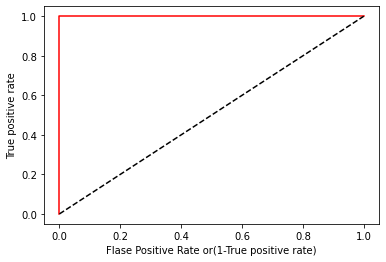

In [20]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')


### Testing Data

In [21]:
y_pred_test = rf_model.predict(X_test)

In [22]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.75
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.70      0.88      0.78        40
           1       0.83      0.62      0.71        40

    accuracy                           0.75        80
   macro avg       0.77      0.75      0.75        80
weighted avg       0.77      0.75      0.75        80

The confusion matrix for testing data is 
 [[35  5]
 [15 25]]


# The model has overfitted.

### Let us use gridsearchcv to get best parameters.

In [23]:
grid_search = GridSearchCV(estimator=rf_model,
                          param_grid={'criterion':['gini','entropy',"log_loss"],
                                     'max_depth':[2,3,4,5,6,7,8,9,10]},
                          cv = 5)
grid_search.fit(X,y) 
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [24]:
grid_search.best_score_

0.8175000000000001

In [36]:
rf_model_1 = RandomForestClassifier(criterion='entropy',max_depth=9)

# Model Training

In [37]:
rf_model_1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9)

# Model Testing || Model Evaluation

### Training Data

In [38]:
y_pred_train = rf_model_1.predict(X_train)

In [39]:
print('The accuracy score for training data is ',accuracy_score(y_train,y_pred_train))
print('The classification report for training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for training data is  0.996875
The classification report for training data is 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       161
           1       0.99      1.00      1.00       159

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

The confusion matrix for training data is 
 [[160   1]
 [  0 159]]


0.9968944099378881


Text(0, 0.5, 'True positive rate')

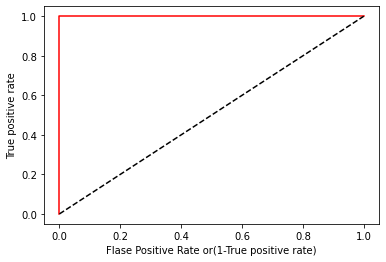

In [40]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_1.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_1 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

### Testing Data

In [41]:
y_pred_test = rf_model_1.predict(X_test)

In [42]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.775
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.71      0.93      0.80        40
           1       0.89      0.62      0.74        40

    accuracy                           0.78        80
   macro avg       0.80      0.78      0.77        80
weighted avg       0.80      0.78      0.77        80

The confusion matrix for testing data is 
 [[37  3]
 [15 25]]


0.775


Text(0, 0.5, 'True positive rate')

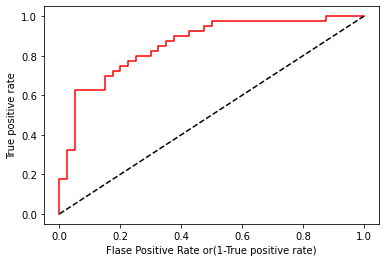

In [43]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_1.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_1 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

# The model is still overfitted.

# Let us take 500 DTs

In [44]:
rf_model_2 = RandomForestClassifier(n_estimators = 500,criterion='entropy',max_depth=9)

In [45]:
# Model Training
rf_model_2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=500)

# Model Testing || Model Evaluation

### Training Data

In [46]:
y_pred_train = rf_model_2.predict(X_train)

In [47]:
print('The accuracy score for training data is ',accuracy_score(y_train,y_pred_train))
print('The classification report for training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for training data is  1.0
The classification report for training data is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       159

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

The confusion matrix for training data is 
 [[161   0]
 [  0 159]]


In [48]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       159

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



0.9562092269229266


Text(0, 0.5, 'True positive rate')

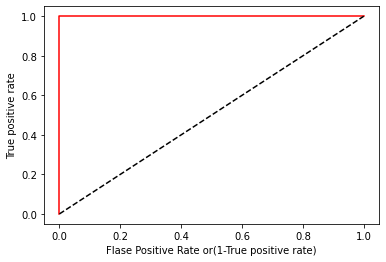

In [66]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_2.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_1 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

### Testing Data

In [50]:
y_pred_test = rf_model_2.predict(X_test)

In [51]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.7625
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.71      0.88      0.79        40
           1       0.84      0.65      0.73        40

    accuracy                           0.76        80
   macro avg       0.78      0.76      0.76        80
weighted avg       0.78      0.76      0.76        80

The confusion matrix for testing data is 
 [[35  5]
 [14 26]]


0.7374999999999999


Text(0, 0.5, 'True positive rate')

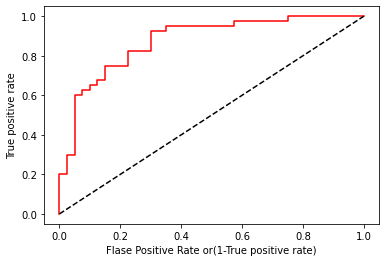

In [67]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_2.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_1 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

# The model is still overfitted.

### Let us use gridsearchcv to get best parameters.

In [53]:
grid_search = GridSearchCV(estimator=rf_model,
                          param_grid={'criterion':['gini','entropy',"log_loss"],
                                     'max_depth':[2,3,4,5,6,7,8,9,10]},
                          cv = 10) 
grid_search.fit(X,y) 
grid_search.best_params_

{'criterion': 'log_loss', 'max_depth': 6}

In [54]:
grid_search.best_score_

0.8150000000000001

In [56]:
rf_model_3 = RandomForestClassifier(criterion='log_loss',max_depth=6)

In [57]:
# Model Training
rf_model_3.fit(X_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=6)

# Model Testing || Model Evaluation

### Training Data

In [58]:
y_pred_train = rf_model_3.predict(X_train)

In [60]:
print(accuracy_score(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

0.95625
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       161
           1       0.96      0.95      0.96       159

    accuracy                           0.96       320
   macro avg       0.96      0.96      0.96       320
weighted avg       0.96      0.96      0.96       320

[[155   6]
 [  8 151]]


0.9562092269229266


Text(0, 0.5, 'True positive rate')

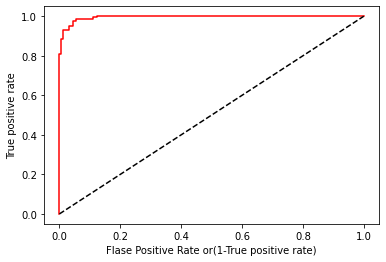

In [61]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_3.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_1 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

### Testing Data

In [62]:
y_pred_test = rf_model_3.predict(X_test)

In [63]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.7375
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.69      0.85      0.76        40
           1       0.81      0.62      0.70        40

    accuracy                           0.74        80
   macro avg       0.75      0.74      0.73        80
weighted avg       0.75      0.74      0.73        80

The confusion matrix for testing data is 
 [[34  6]
 [15 25]]


0.7374999999999999


Text(0, 0.5, 'True positive rate')

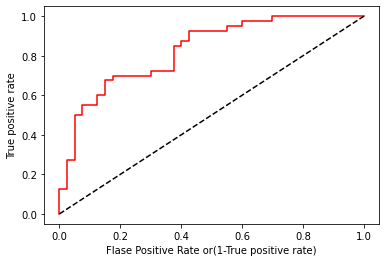

In [65]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_3.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_1 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

# rf_model_1 is giving better results than this one rf_model_3

# let us take 250 DTs in the rf_model_1

In [68]:
rf_model_4 = RandomForestClassifier(n_estimators=250,criterion='entropy',max_depth=9)

In [69]:
# Model Training
rf_model_4.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=250)

# Model Testing || Model Evaluation

### Training Data

In [70]:
y_pred_train = rf_model_4.predict(X_train)

In [71]:
print('The accuracy score for training data is ',accuracy_score(y_train,y_pred_train))
print('The classification report for training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for training data is  1.0
The classification report for training data is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       159

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

The confusion matrix for training data is 
 [[161   0]
 [  0 159]]


1.0


Text(0, 0.5, 'True positive rate')

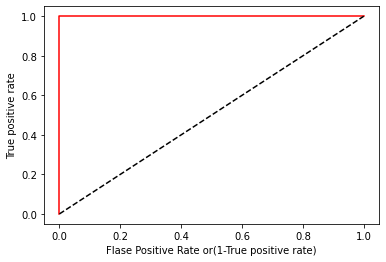

In [74]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_4.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_4 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

### Testing Data

In [75]:
y_pred_test = rf_model_4.predict(X_test)

In [76]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.7875
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.73      0.93      0.81        40
           1       0.90      0.65      0.75        40

    accuracy                           0.79        80
   macro avg       0.81      0.79      0.78        80
weighted avg       0.81      0.79      0.78        80

The confusion matrix for testing data is 
 [[37  3]
 [14 26]]


0.7875


Text(0, 0.5, 'True positive rate')

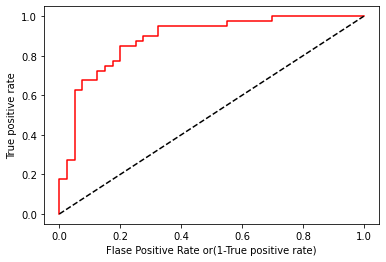

In [79]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_4.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_4 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

# This rf_model_4 is better than rf_model_1

# let us take 500 DTs in the rf_model_4

In [80]:
rf_model_5 = RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=9)

In [81]:
# Model Training
rf_model_5.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=500)

# Model Testing || Model Evaluation

### Training Data

In [82]:
y_pred_train = rf_model_5.predict(X_train)

In [83]:
print('The accuracy score for training data is ',accuracy_score(y_train,y_pred_train))
print('The classification report for training data is \n',classification_report(y_train,y_pred_train))
print('The confusion matrix for training data is \n',confusion_matrix(y_train,y_pred_train))

The accuracy score for training data is  0.996875
The classification report for training data is 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       161
           1       0.99      1.00      1.00       159

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

The confusion matrix for training data is 
 [[160   1]
 [  0 159]]


0.9968944099378881


Text(0, 0.5, 'True positive rate')

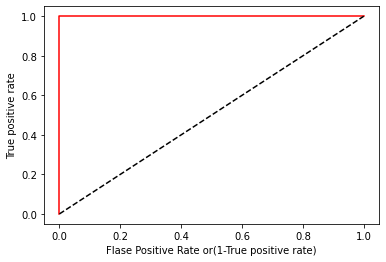

In [84]:
fpr,tpr,threshholds = roc_curve(y_train,rf_model_5.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_5 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

### Testing Data

In [85]:
y_pred_test = rf_model_5.predict(X_test)

In [86]:
print('The accuracy score for testing data is ',accuracy_score(y_test,y_pred_test))
print('The classification report for testing data is \n',classification_report(y_test,y_pred_test))
print('The confusion matrix for testing data is \n',confusion_matrix(y_test,y_pred_test))

The accuracy score for testing data is  0.7625
The classification report for testing data is 
               precision    recall  f1-score   support

           0       0.71      0.90      0.79        40
           1       0.86      0.62      0.72        40

    accuracy                           0.76        80
   macro avg       0.78      0.76      0.76        80
weighted avg       0.78      0.76      0.76        80

The confusion matrix for testing data is 
 [[36  4]
 [15 25]]


0.7625000000000001


Text(0, 0.5, 'True positive rate')

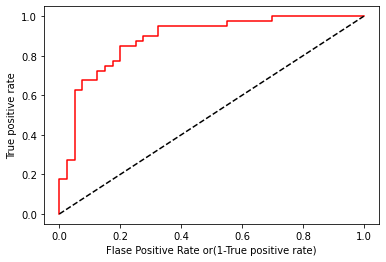

In [87]:
fpr,tpr,threshholds = roc_curve(y_test,rf_model_4.predict_proba(X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red',label = 'rf_model_4 (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase Positive Rate or(1-True positive rate)')
plt.ylabel('True positive rate')

# Out of all the above models, rf_mode_4 is better model.
rf_mode_4 :- n_estimators=250,criterion='entropy',max_depth=9

In [88]:
imp_features = pd.DataFrame()
imp_features.insert(loc=0,column='FeatureName',value=rf_model_4.feature_names_in_)
imp_features.insert(loc=1,column='FeatureImp',value=rf_model_4.feature_importances_)
imp_features.sort_values(by='FeatureImp',ascending=False)

,FeatureName,FeatureImp
4,Price,0.250379
0,CompPrice,0.126788
6,Age,0.125333
2,Advertising,0.117311
5,ShelveLoc,0.115383
1,Income,0.098703
3,Population,0.084866
7,Education,0.051787
9,US,0.017912
8,Urban,0.011539


# Price is the important attribute for sales in a clothing company.